In [3]:
#%pip install cerebras_cloud_sdk

In [1]:
import os
from cerebras.cloud.sdk import Cerebras

os.environ['CEREBRAS_API_KEY'] = 'csk-4nryfm65rjdf8e2vrmcx8ch3kw8n5v4wynpdd6e3rwmw9d3k'

client = Cerebras(
    # This is the default and can be omitted
    api_key=os.environ.get("CEREBRAS_API_KEY"),
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Why is fast inference important?",
        }
],
    model="llama3.1-8b",
)

print(chat_completion)

ChatCompletion(id='chatcmpl-f72c427c-2bbd-44d7-96de-ea6ee67bc986', choices=[Choice(finish_reason='stop', index=0, message=ChoiceMessage(role='assistant', content="Fast inference is crucial in various domains, particularly those involving artificial intelligence (AI) and machine learning (ML). Inference refers to the process of applying a trained model to a new, unseen input to generate a prediction or output. The importance of fast inference stems from several factors:\n\n1. **Interactive Systems**: Many applications require models to respond in real-time. For instance, chatbots, virtual assistants, and real-time language translation require immediate responses to user queries. Fast inference ensures that these systems can respond promptly without delay, making interactions smoother and user-friendly.\n\n2. **High-Throughput and Large Datasets**: In scenarios involving large datasets (e.g., image recognition for security surveillance or object detection in autonomous vehicles), the mod

In [3]:
import http.client

conn = http.client.HTTPSConnection("yahoo-finance15.p.rapidapi.com")

headers = {
    'x-rapidapi-key': "69a7298d19msh6df706df60873e7p11a420jsn3319cdea9e0e",
    'x-rapidapi-host': "yahoo-finance15.p.rapidapi.com"
}

conn.request("GET", "/api/v1/markets/options/most-active?type=STOCKS", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"meta":{"version":"v1.0","status":200,"copywrite":"https:\/\/apicalls.io","count":20,"total":500,"page":1},"body":[{"symbol":"NVDA","symbolType":1,"symbolName":"Nvidia Corp","hasOptions":"Yes","lastPrice":"134.80","priceChange":"-0.01","percentChange":"-0.01%","optionsImpliedVolatilityRank1y":"25.83%","optionsTotalVolume":"3,779,108","optionsPutVolumePercent":"38.0%","optionsCallVolumePercent":"62.0%","optionsPutCallVolumeRatio":"0.61","tradeTime":"10\/11\/24","symbolCode":"STK"},{"symbol":"TSLA","symbolType":1,"symbolName":"Tesla Inc","hasOptions":"Yes","lastPrice":"217.80","priceChange":"-20.97","percentChange":"-8.78%","optionsImpliedVolatilityRank1y":"62.77%","optionsTotalVolume":"3,733,681","optionsPutVolumePercent":"39.8%","optionsCallVolumePercent":"60.2%","optionsPutCallVolumeRatio":"0.66","tradeTime":"10\/11\/24","symbolCode":"STK"},{"symbol":"AMD","symbolType":1,"symbolName":"Adv Micro Devices","hasOptions":"Yes","lastPrice":"167.89","priceChange":"+3.71","percentChange":"+2

Raw Response: {'meta': {'version': 'v1.0', 'status': 200, 'copywrite': 'https://apicalls.io', 'count': 20, 'total': 500, 'page': 1}, 'body': [{'symbol': 'NVDA', 'symbolType': 1, 'symbolName': 'Nvidia Corp', 'hasOptions': 'Yes', 'lastPrice': '134.80', 'priceChange': '-0.01', 'percentChange': '-0.01%', 'optionsImpliedVolatilityRank1y': '25.83%', 'optionsTotalVolume': '3,779,108', 'optionsPutVolumePercent': '38.0%', 'optionsCallVolumePercent': '62.0%', 'optionsPutCallVolumeRatio': '0.61', 'tradeTime': '10/11/24', 'symbolCode': 'STK'}, {'symbol': 'TSLA', 'symbolType': 1, 'symbolName': 'Tesla Inc', 'hasOptions': 'Yes', 'lastPrice': '217.80', 'priceChange': '-20.97', 'percentChange': '-8.78%', 'optionsImpliedVolatilityRank1y': '62.77%', 'optionsTotalVolume': '3,733,681', 'optionsPutVolumePercent': '39.8%', 'optionsCallVolumePercent': '60.2%', 'optionsPutCallVolumeRatio': '0.66', 'tradeTime': '10/11/24', 'symbolCode': 'STK'}, {'symbol': 'AMD', 'symbolType': 1, 'symbolName': 'Adv Micro Devices

/var/folders/nt/nmz85frs1_z27cy8b2m7lt380000gn/T/ipykernel_42694/1320981818.py:86: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


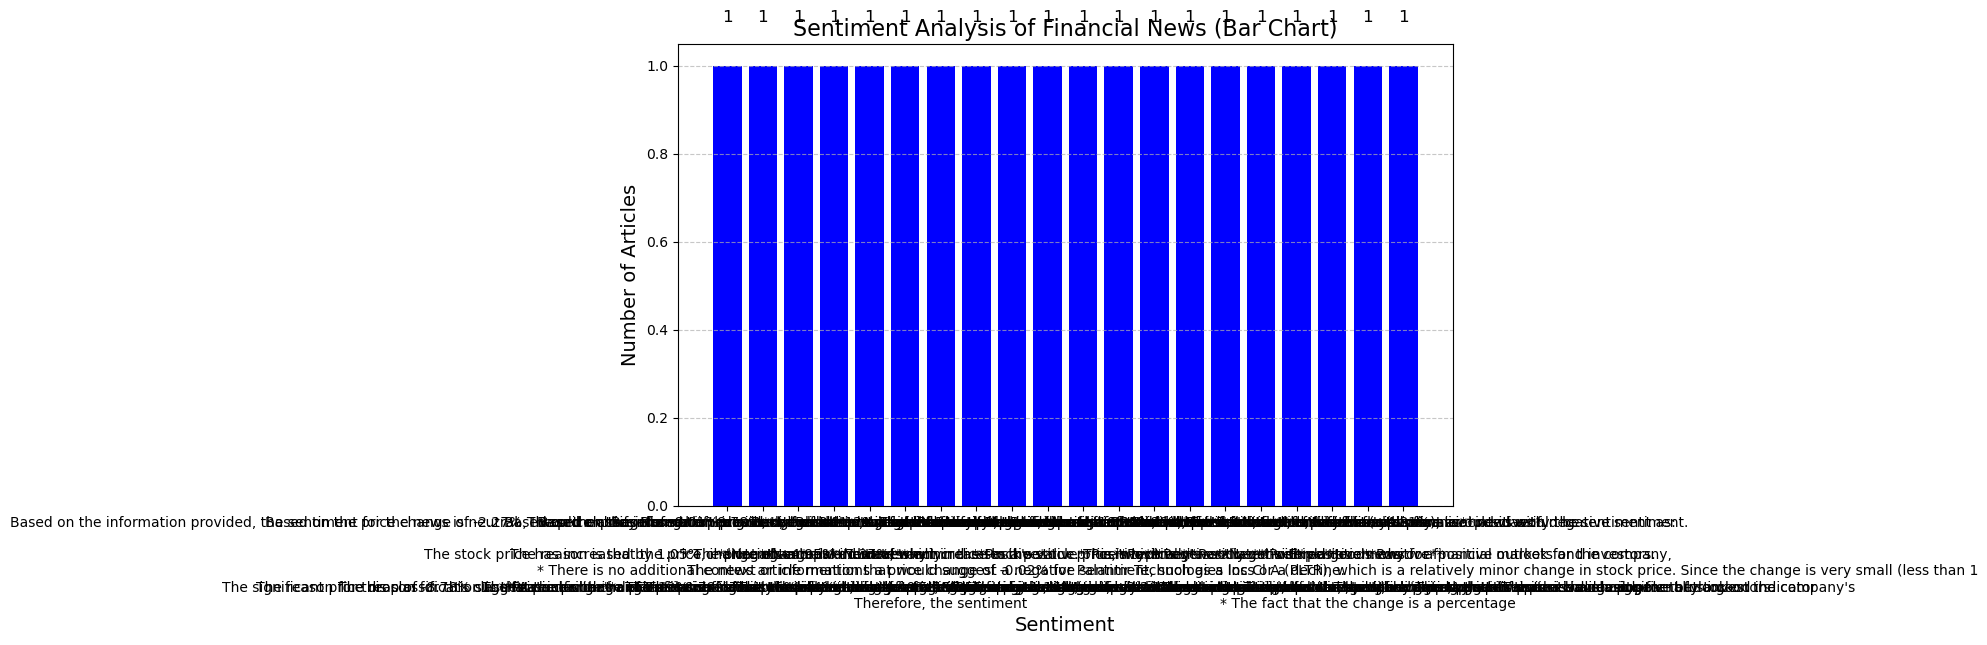

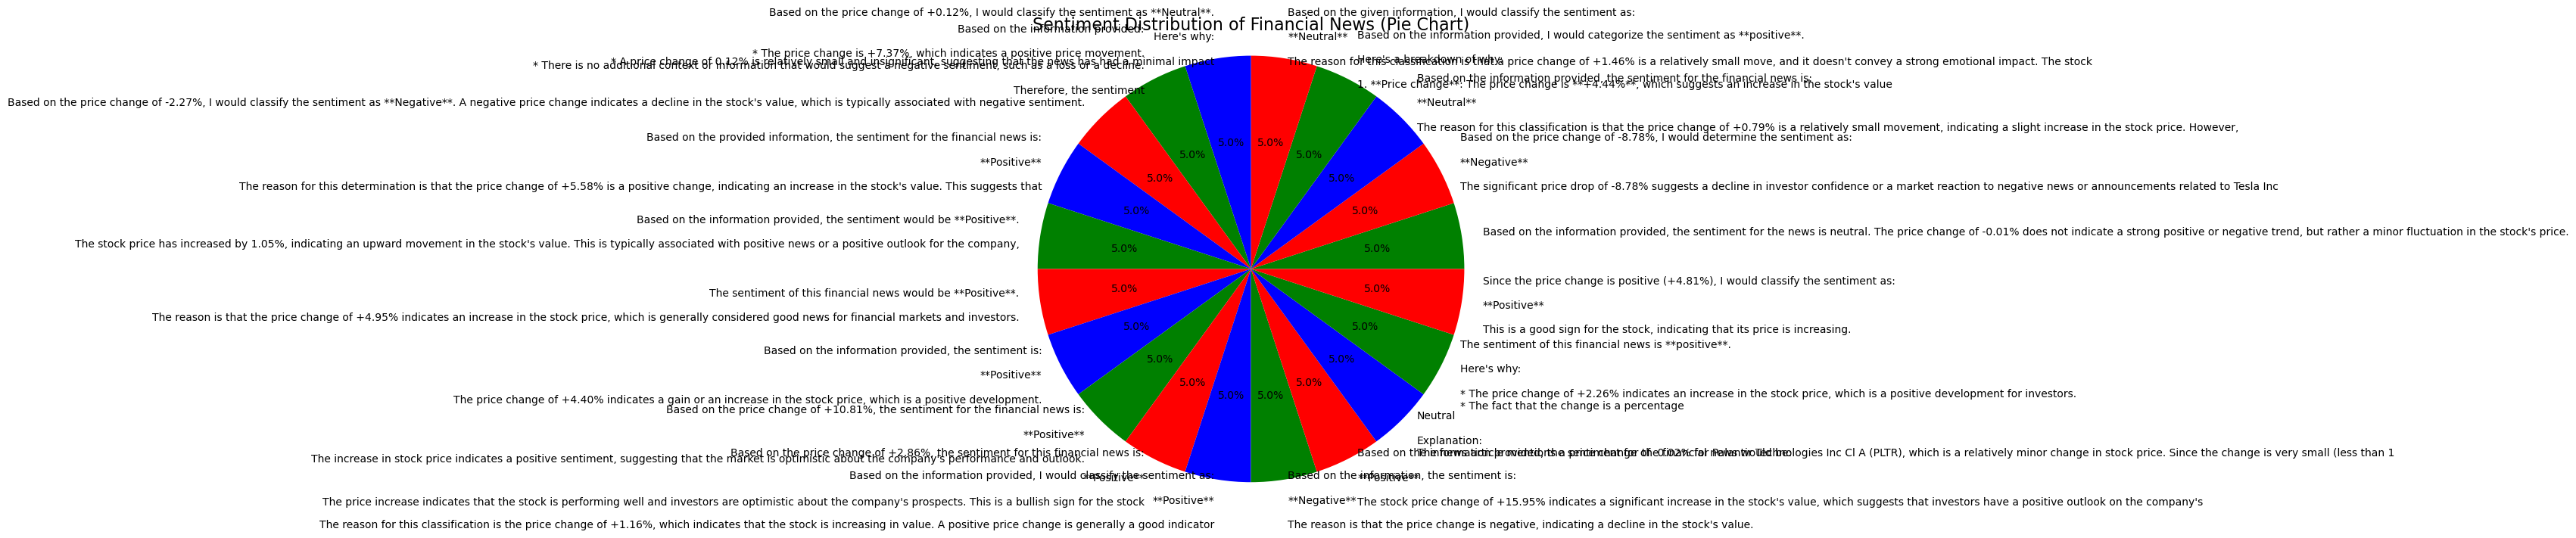

   Symbol                                 Name Percent Change  \
0    NVDA                          Nvidia Corp         -0.01%   
1    TSLA                            Tesla Inc         -8.78%   
2     AMD                    Adv Micro Devices         +2.26%   
3    PLTR       Palantir Technologies Inc Cl A         -0.02%   
4    MSTR                   Microstrategy Cl A        +15.95%   
5    AAPL                            Apple Inc         -0.65%   
6    AMZN                       Amazon.com Inc         +1.16%   
7    SMCI                 Super Micro Computer         +2.86%   
8    UBER                Uber Technologies Inc        +10.81%   
9    SOFI                Sofi Technologies Inc         +4.40%   
10    BAC                 Bank of America Corp         +4.95%   
11   META                   Meta Platforms Inc         +1.05%   
12   MARA                    Mara Holdings Inc         +5.58%   
13   AVGO                         Broadcom Ltd         -2.27%   
14   COIN             Coi

In [5]:
# Sentiment Analysis using Cerebras API and LLaMA 3.1

import requests
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Data Collection from Financial News
def fetch_news_data(api_url, headers):
    """
    Fetch financial news data from Yahoo Finance API and handle JSON responses gracefully.
    """
    response = requests.get(api_url, headers=headers)
    
    # Check if request was successful
    if response.status_code == 200:
        try:
            news_data = response.json()  # Parse JSON response
            print("Raw Response:", news_data)  # Inspect the full JSON response
            articles = news_data.get('body', [])  # Get articles from 'body'
            if len(articles) == 0:
                print("No articles found!")
            # Extract symbol and related information
            return [(article['symbol'], article['symbolName'], article['percentChange']) for article in articles]
        except ValueError as e:
            print(f"Error parsing JSON: {e}")
            return []
    else:
        print(f"Error fetching news: {response.status_code}")
        return []



# Example API for fetching news
financial_news_api_url = "https://yahoo-finance15.p.rapidapi.com/api/v1/markets/options/most-active?type=STOCKS"
headers = {
    'x-rapidapi-key': "69a7298d19msh6df706df60873e7p11a420jsn3319cdea9e0e",
    'x-rapidapi-host': "yahoo-finance15.p.rapidapi.com"
}
news_articles = fetch_news_data(financial_news_api_url, headers)

def analyze_sentiment(text):
    """
    Function to analyze sentiment of a financial news article using Cerebras and LLaMA.
    """
    prompt = f"Determine the sentiment (positive, neutral, negative) for the following financial news: {text}"
    response = client.chat.completions.create(
        model="llama3.1-8b",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=50
    )
    
    # Print the entire response to inspect its structure
    print("Chat Completion Response:", response)

    # Access the generated text correctly
    sentiment = response.choices[0].message.content  # Use the correct attribute path
    return sentiment.strip()

# Analyze sentiment for each article
news_with_sentiment = []
for symbol, name, percent_change in news_articles:
    sentiment = analyze_sentiment(f"Stock {name} ({symbol}) with a price change of {percent_change}")
    news_with_sentiment.append((symbol, name, percent_change, sentiment))

# Create DataFrame
df = pd.DataFrame(news_with_sentiment, columns=['Symbol', 'Name', 'Percent Change', 'Sentiment'])

# Count sentiments
sentiment_counts = df['Sentiment'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
colors = ['green' if sentiment == 'Positive' else 'red' if sentiment == 'Negative' else 'blue' for sentiment in sentiment_counts.index]
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)

plt.title('Sentiment Analysis of Financial News (Bar Chart)', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=0)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=['green', 'red', 'blue'], autopct='%1.1f%%')
plt.title('Sentiment Distribution of Financial News (Pie Chart)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

# Display as table
print(df)